# Travaux pratiques : Séance 3
## Première partie

Importation des librairies et des modules nécessaires

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Fonction permettant d'afficher les données

In [2]:
def plot_dataset(dataset,index_feature1,index_feature2):
    colors = ['red','blue','green']
    for i in range(len(dataset.target_names)):
        plt.scatter(dataset.data[dataset.target==i,index_feature1], dataset.data[dataset.target==i,index_feature2], c=colors[i], label= dataset.target_names[i])
    plt.xlabel(dataset.feature_names[index_feature1])
    plt.ylabel(dataset.feature_names[index_feature2])
    plt.legend()
    plt.show()

Importation du dataset et sauvegarde de la partie data/target

In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2] # sélection des deux premières features (longueur et largeur des sépales)
y = iris.target

In [4]:
print(y) # /!\ l'ordre des données nous oblige à faire la séparation en ensemble d'entrainement/test "au hasard"
         # --> on doit utiliser la fonction train_test_split

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Affichage des données grâce à la fonction plot_dataset

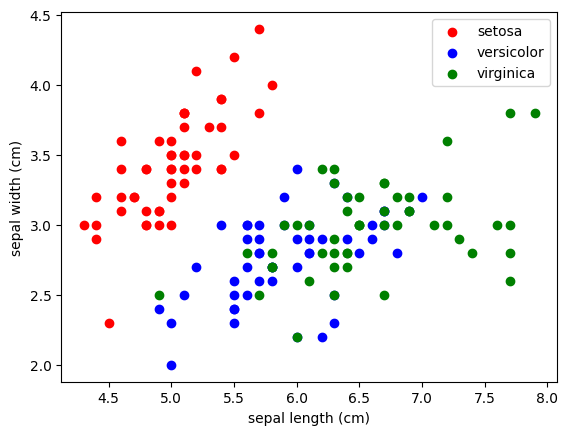

In [5]:
plot_dataset(iris,0,1)

Division des données en un ensemble d'entrainement et de test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.33,random_state=42) 

Génération d'un modèle K-nn, entrainement sur l'ensemble d'entrainement et affichage des accuracy pour l'ensemble d'entrainement et l'ensemble de test

In [7]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
print("Accuracy de l'ensemble de test : ", accuracy_test)

y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
print("Accuracy de l'ensemble d'entrainement : ", accuracy_train)

Accuracy de l'ensemble de test :  0.74
Accuracy de l'ensemble d'entrainement :  0.86


Affichage des frontières de décision

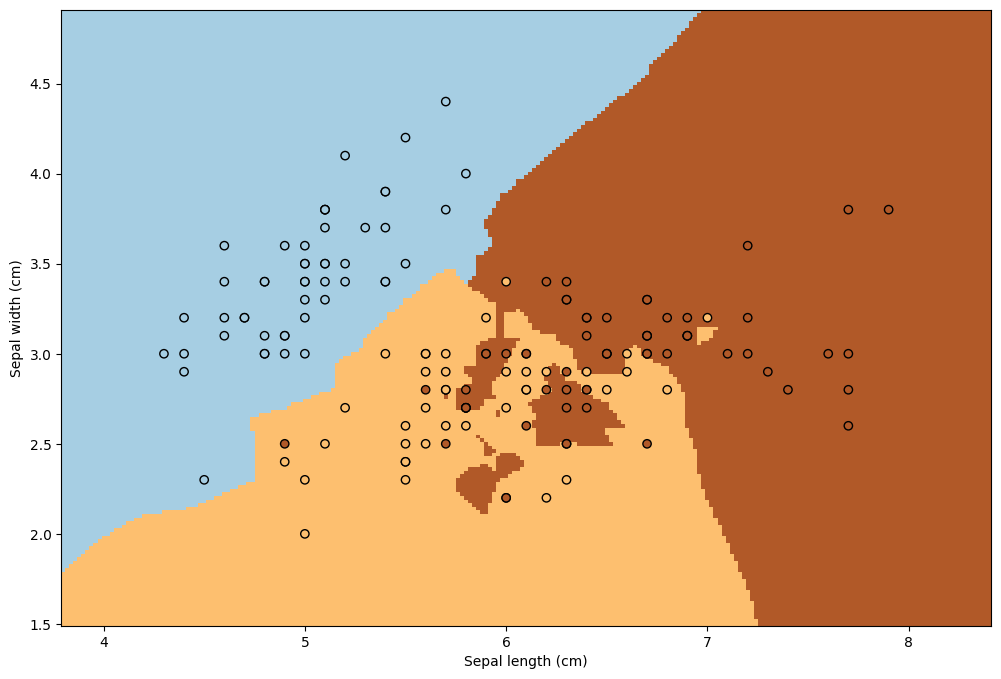

In [8]:
h = .02

x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 8))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:,0], X[:,1],c=y, edgecolors='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

plt.show()